In [1]:
# with respect to machine learning image reconstruction techniques


# encoder

In [2]:
# hey i will go to gym 
# encode 21 wd e qwed qw r 


# decode it 


In [3]:
import matplotlib.pyplot as plt
import numpy as np


In [4]:
image = np.random.randint(1,255,(10,10))

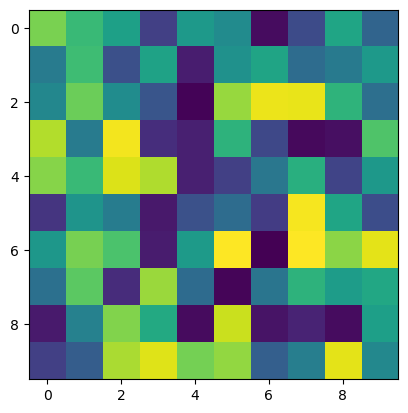

In [5]:
plt.imshow(image)

In [6]:
image.shape

(10, 10)

In [7]:
image1d = image.reshape([1,100])



In [8]:
image1d.shape

(1, 100)

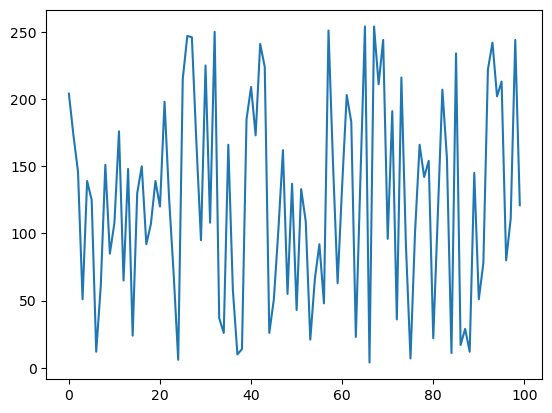

In [9]:
plt.plot(image1d[0,:])

In [2]:
image = plt.imread("images/bug on flower.jpeg")

NameError: name 'plt' is not defined

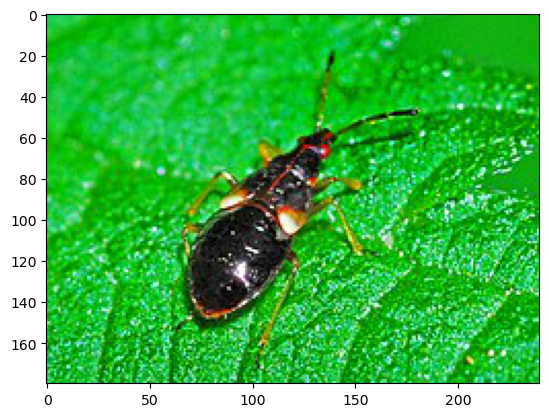

In [11]:
plt.imshow(image)

In [13]:
# change image to 1d vector first see the size of image

In [15]:
image.shape

(180, 240, 3)

In [22]:
180 * 240 *3


129600

In [25]:
img1d = image.reshape([129600,1])

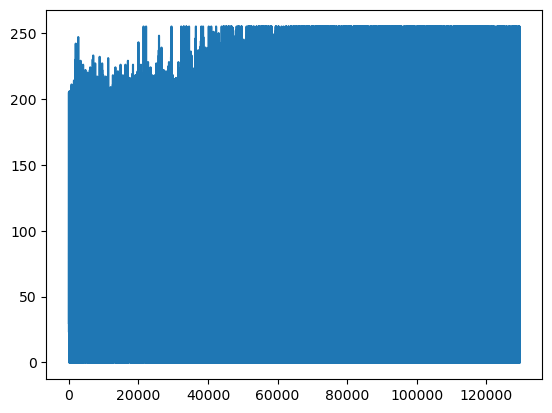

In [26]:
plt.plot(img1d)

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D
from tensorflow.keras.models import Model

# Define the autoencoder model
def create_autoencoder(input_shape):
    # Encoder
    input_img = Input(shape=input_shape)
    x = Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
    x = MaxPooling2D((2, 2), padding='same')(x)
    x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
    x = MaxPooling2D((2, 2), padding='same')(x)
    x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
    encoded = MaxPooling2D((2, 2), padding='same')(x)

    # Decoder
    x = Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
    x = UpSampling2D((2, 2))(x)
    x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
    x = UpSampling2D((2, 2))(x)
    x = Conv2D(16, (3, 3), activation='relu')(x)
    x = UpSampling2D((2, 2))(x)
    decoded = Conv2D(3, (3, 3), activation='sigmoid', padding='same')(x)  # Output has same shape as input

    autoencoder = Model(input_img, decoded)
    return autoencoder

# Example usage
input_shape = image.shape  # Example input shape for an image with size 64x64 and 3 color channels (RGB)
autoencoder_model = create_autoencoder(input_shape)

# Print model summary
autoencoder_model.summary()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
image = plt.imread("/Users/angelasthingy/Desktop/preply-course-computer-science/Machine learning/images/bug on flower.jpeg")
# Assuming 'image' contains your image data

# Preprocess the image (reshape and normalize)
input_image = np.expand_dims(image, axis=0)  # Add batch dimension
input_image = input_image.astype('float32') / 255.  # Normalize pixel values to [0, 1]

# Reconstruct the image using the autoencoder model
reconstructed_image = autoencoder_model.predict(input_image)

# Display the original and reconstructed images (optional)
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
# Original image
plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(image)
plt.axis('off')
# Reconstructed image
plt.subplot(1, 2, 2)
plt.title('Reconstructed Image')
plt.imshow(reconstructed_image[0])  # Accessing the image in the batch
plt.axis('off')
plt.show()


NameError: name 'autoencoder_model' is not defined